In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

#Classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path6 = 'Epileptic Seizure Recognition.csv' 
figures_path = './figures'

In [3]:
Data = pd.read_csv(data_path6)

In [4]:
Data=Data.drop(["Unnamed"],axis=1)

In [5]:
Labels = Data['y'].values
Features = Data.drop(['y'],axis=1).values


print('Features shape:', Features.shape)
print('Labels shape:', Labels.shape)

Features shape: (11500, 178)
Labels shape: (11500,)


In [6]:
for i in range(len(Labels)):
  Labels[i] = Labels[i]-1

In [7]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [8]:
# Write function for aggregate metrics 
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0 
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred) 
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------") 

In [9]:
class KerasBatchClassifier(KerasClassifier, BaseEstimator):
    def __init__(self, model, **kwargs):
        super().__init__(model)
        self.fit_kwargs = kwargs
        self._estimator_type = 'classifier'

    def fit(self, x, y, *args, **kwargs):
        y = np.array(y)
        if len(y.shape) == 2 and y.shape[1] > 1:
          self.classes_ = np.arange(y.shape[1])
        elif (len(y.shape) == 2 and y.shape[1] == 1) or len(y.shape) == 1:
          self.classes_ = np.unique(y)
          y = np.searchsorted(self.classes_, y)
        else:
          raise ValueError('Invalid shape for y: ' + str(y.shape))
        self.n_classes_ = len(self.classes_)
        return super(KerasClassifier, self).fit(x, y, **self.fit_kwargs)


# RED NEURONAL
def FullyConnected():
  inputs = Input(shape=(X_train.shape[1],), name="input_1")
  layers = Dense(512, activation="selu")(inputs)
  layers = Dense(256, activation="selu")(layers)
  layers = Dense(128, activation="selu")(layers)
  layers = Dense(64, activation="selu")(layers)

#agregar capas 
  predictions = Dense(len(classes), activation="softmax", name="output_1")(layers)
  model = Model(inputs = inputs, outputs=predictions)
  optimizer=RMSprop() 
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, stratify=Labels, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (9200, 178)
Train labels shape: (9200,)
Test data shape: (2300, 178)
Test labels shape: (2300,)


In [11]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#classes 
classes = [0, 1, 2, 3, 4]

In [13]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([    ('classifier', RandomForestClassifier())])
parameters = {
  'classifier__n_estimators': [50, 100, 150,200,250,300,400,500],
    'classifier__max_depth': [None, 10, 20,30,40],
    'classifier__min_samples_split': [2, 4, 6,8,10],
    'classifier__random_state':[10,20,30,40,50] 
}
grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30, 40],
                         'classifier__min_samples_split': [2, 4, 6, 8, 10],
                         'classifier__n_estimators': [50, 100, 150, 200, 250,
                                                      300, 400, 500],
                         'classifier__random_state': [10, 20, 30, 40, 50]})

In [14]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Puntuación de validación cruzada media del mejor modelo:")
print(grid_search.best_score_)

Mejores parámetros encontrados:
{'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500, 'classifier__random_state': 40}
Puntuación de validación cruzada media del mejor modelo:
0.7052173913043479


Train runtime: 16.369577646255493
72/72 [==============================] - 0s 1ms/step
Test runtime: 0.5634498596191406


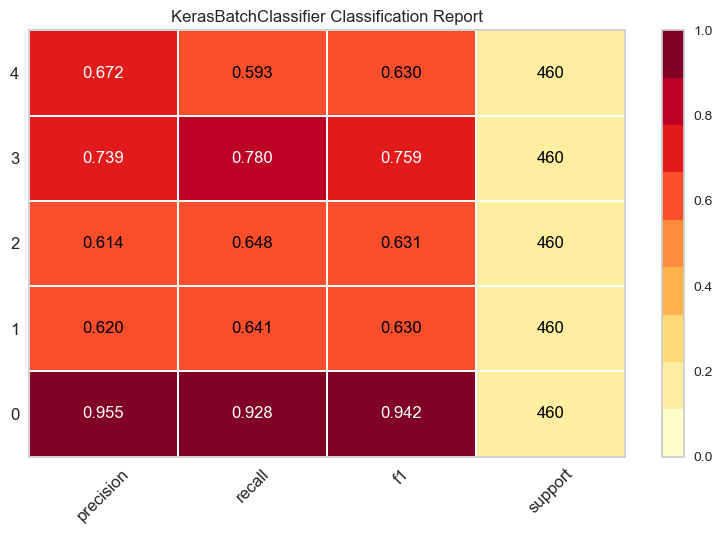

72/72 [==============================] - 0s 1ms/step - loss: 2.3119 - accuracy: 0.7183


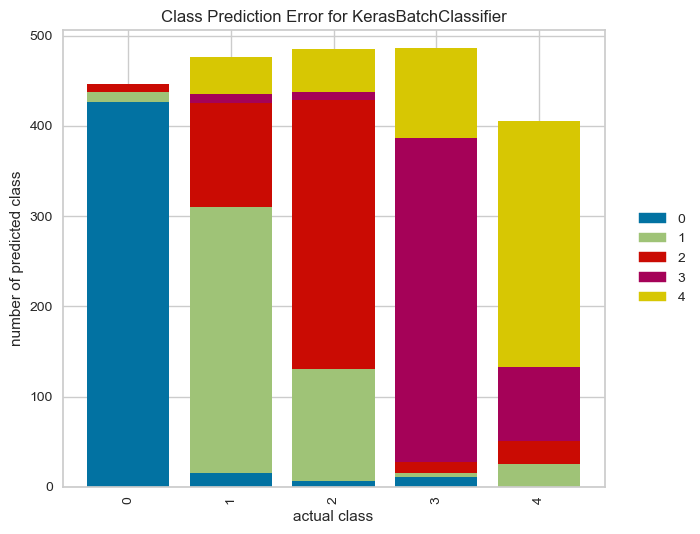

72/72 [==============================] - 0s 1ms/step


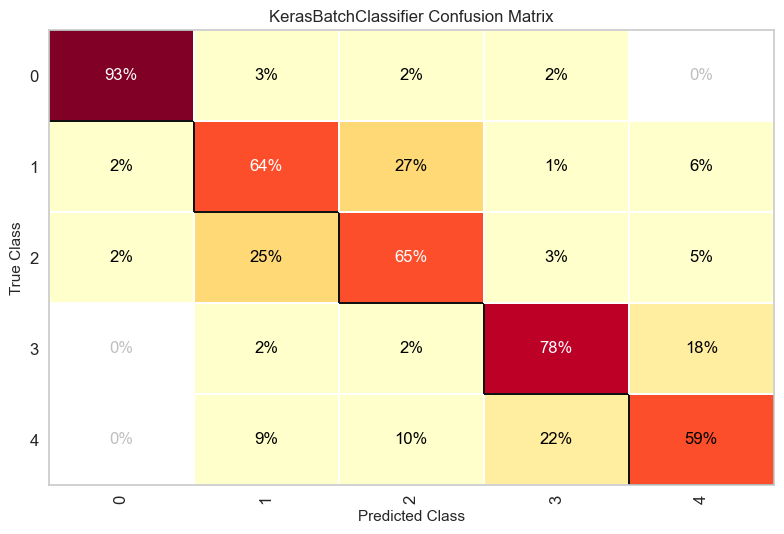

72/72 [==============================] - 0s 1ms/step


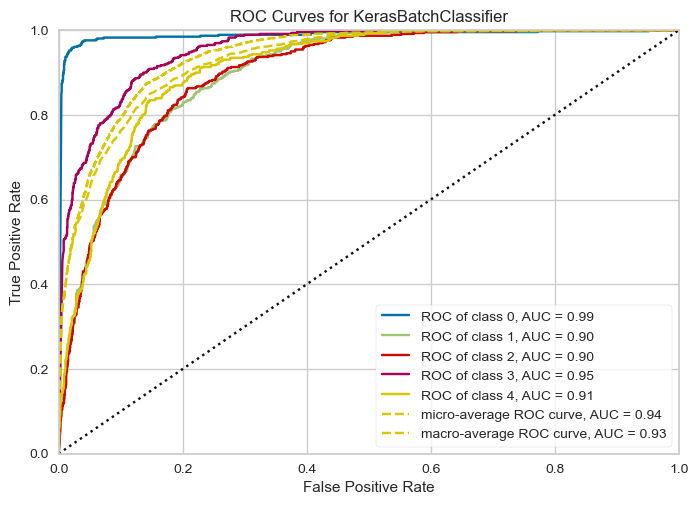

KerasBatchClassifier(build_fn=<function FullyConnected at 0x000001F7C2BE30D0>)
72/72 [==============================] - 0s 1ms/step
accuracy_score: 0.7391
cohen_kappa_score: 0.6739
log_loss: 2.2239
zero_one_loss: 0.2609
hemming_loss: 0.2609
matthews_corrcoef: 0.6739

---------------------------------------------------------------------------------


In [13]:
classifiers=[KerasBatchClassifier(FullyConnected, epochs=100, batch_size=228, verbose=0)]
names = ['FNN']

visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz()]

classifier_metrics() 